In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class LinearRegression:


    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4, batch_size=64, random_state=42, verbose=False) -> None:
        
        np.random.seed(random_state)
        
        self.m, self.n = None, None
        self.verbose = verbose
        self.lr = learning_rate
        self.tol = tol
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.loss = np.zeros(shape = (self.max_iter, ))


    def predict(self, X):

        if self.m is None:

            self.m = X.shape[0]
        
        X = np.hstack((np.ones((self.m, 1)), X))
        return np.dot(X, self.coefs_)
    

    def batch_generator(self, X, y, batch_size):

        num_samples, _ = X.shape
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        for start in np.arange(0, num_samples, self.batch_size):

            end = min(start + self.batch_size, num_samples)
            yield X[start : end], y[start : end]
        

    def fit(self, X, y) -> None:

        self.m, self.n = X.shape
        X = np.hstack((np.ones((self.m, 1)), X))

        if y.ndim == 1:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, ))
        
        else:

            self.coefs_ = np.random.uniform(-0.5, 0.5, size = (self.n + 1, 1))
        

        for e in np.arange(self.max_iter):

            total_loss = 0

            for x_batch, y_batch in self.batch_generator(X, y, self.batch_size):

                pred = np.dot(x_batch, self.coefs_)
                loss = np.mean(np.square(y_batch - pred))
                total_loss += loss

                self.coefs_ -= self.lr * (-2 / len(x_batch)) * np.dot(x_batch.T, y_batch - pred)
            
            self.loss[e] = total_loss / (self.m / self.batch_size)

            if self.verbose:
                print(f"epoch {e}/{self.max_iter} -- loss {self.loss[e]:.2f}")

            if e >= 1 and np.abs(self.loss[e] - self.loss[e - 1]) < self.tol:

                break

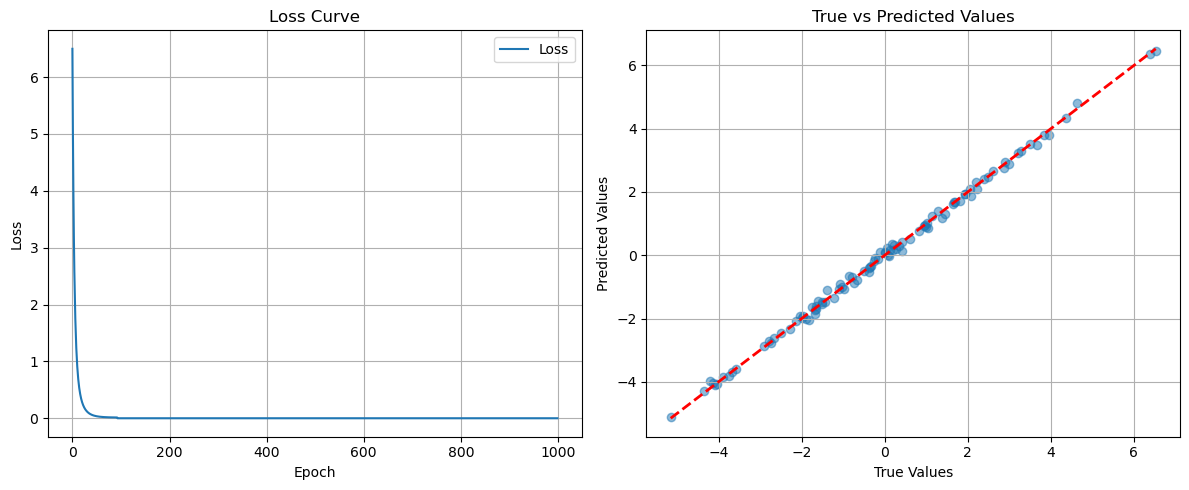

In [6]:
np.random.seed(42)  
n_samples = 100  
n_features = 10  


X = np.random.randn(n_samples, n_features)
true_coefs = np.random.randn(n_features)
y = X.dot(true_coefs) + np.random.randn(n_samples) * 0.1 


model = LinearRegression(learning_rate=0.01, max_iter=1000, tol=1e-4, batch_size=32, verbose=False)
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.plot(np.arange(model.max_iter), model.loss, label="Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2) 
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()